# ACSE-7 (Inversion and Optimisation)  <a class="tocSkip"></a>

# Lecture 2: Unconstrained Optimisation <a class="tocSkip"></a>

<font size="1pt">Some $\LaTeX$ definitions hidden in this cell (double-click to reveal)</font>
$
\renewcommand\vec[1]{\mathbf{#1}}
\newcommand\mat[1]{\underline{\mathbf{#1}}}
\newcommand\R{\mathbb{R}}
$

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Optimisation-vs.-Root-Finding" data-toc-modified-id="Optimisation-vs.-Root-Finding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Optimisation vs. Root Finding</a></span><ul class="toc-item"><li><span><a href="#Local-Minima-and-Maxima-(extrema)" data-toc-modified-id="Local-Minima-and-Maxima-(extrema)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Local Minima and Maxima (extrema)</a></span></li><li><span><a href="#Symmetric-Positive-Definite-(SPD)-Matrices" data-toc-modified-id="Symmetric-Positive-Definite-(SPD)-Matrices-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Symmetric Positive Definite (SPD) Matrices</a></span></li><li><span><a href="#Necessary-and-sufficient-conditions-for-local-minima" data-toc-modified-id="Necessary-and-sufficient-conditions-for-local-minima-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Necessary and sufficient conditions for local minima</a></span></li><li><span><a href="#Quadratic-Minimisation-and-Linear-Inversion" data-toc-modified-id="Quadratic-Minimisation-and-Linear-Inversion-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Quadratic Minimisation and Linear Inversion</a></span></li></ul></li><li><span><a href="#Steepest-descent" data-toc-modified-id="Steepest-descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Steepest descent</a></span></li><li><span><a href="#Conjugate-gradient" data-toc-modified-id="Conjugate-gradient-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conjugate gradient</a></span><ul class="toc-item"><li><span><a href="#Inner-Products,-Orthogonality-and-Norms" data-toc-modified-id="Inner-Products,-Orthogonality-and-Norms-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Inner Products, Orthogonality and Norms</a></span></li><li><span><a href="#Inner-Products-and-Coordinate-Transformations-(*)" data-toc-modified-id="Inner-Products-and-Coordinate-Transformations-(*)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Inner Products and Coordinate Transformations (*)</a></span></li><li><span><a href="#Changing-directions" data-toc-modified-id="Changing-directions-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Changing directions</a></span></li><li><span><a href="#Multiple-dimensions" data-toc-modified-id="Multiple-dimensions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Multiple dimensions</a></span></li><li><span><a href="#The-Krylov-subspace" data-toc-modified-id="The-Krylov-subspace-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>The Krylov subspace</a></span></li><li><span><a href="#Finally:-the-Conjugate-Gradient-algorithm" data-toc-modified-id="Finally:-the-Conjugate-Gradient-algorithm-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Finally: the Conjugate Gradient algorithm</a></span></li></ul></li><li><span><a href="#Nonlinear-Conjugate-Gradient-(*)" data-toc-modified-id="Nonlinear-Conjugate-Gradient-(*)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Nonlinear Conjugate Gradient (*)</a></span></li><li><span><a href="#List-of-Definitions" data-toc-modified-id="List-of-Definitions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>List of Definitions</a></span></li></ul></div>

## Summary <a class="tocSkip"></a>
In this lecture we look closer at the relationship between optimisation problems and root-finding problems, in particular in multiple dimensions. We introduce our first two methods to solve these problems: Steepest Descent and Conjugate Gradient (CG). The ideas behind both methods will come back in the coming few lectures. The steepest descent method is not a very efficient method in general, but the idea behind it and its convergence behaviour are important in the analysis of all methods. The CG method, after some further improvements introduced in lecture 5, is in fact the most powerful method for a certain class of problems based on Symmetric Positive Definite systems. 
    
### Important concepts: <a class="tocSkip"></a>
- conditions for local minima
- the relation between optimisation and root-finding problems (a form of inversion), in particular the optimisation of a quadratic function and linear inversion
- the role of the residual vector, how it relates to the gradient in an optimisation problem, and the relation between error (the mismatch between an approximation and the exact answer) and the residual
- the Steepest Descent method: always heading in the direction of the negative gradient
- the Conjugate Gradient method: the role of $\underline{\mathbf{A}}$-orthogonality and the $\underline{\mathbf{A}}$-norm
- the concept of the Krylov Subspace, which will come back in lecture 5

In [4]:
# needs to be in separate cell!
%matplotlib inline

In [5]:
# these two lines ensure that imported modules are automatically reloaded when changed
%load_ext autoreload
%autoreload 2
from lecture2 import *  # you need lecture2.py in the same folder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Advanced Material (*) <a class="tocSkip"></a>
<div class="optional">
Some advanced material is contained in (sub)sections marked with a (*) (e.g. section 4 in this lecture), exposing some more mathematical detail behind the algorithms. These are not core material, and we will not have time to go through all of these in the lecture. If you execute the following cell these sections will also be marked in blue:
</div>

In [6]:
%%html
<style>
a.definition {
    color: blue;
    font-style: italic;
    font-weight: bold;
}
div.optional {
    display: block;
    background-color: #f0f8ff;
    border-color: #e0f0ff;
    border-left: 5px solid #e0f0ff;
    padding: 0.5em;
}
</style>

# Optimisation vs. Root Finding

Consider the general <a class="definition" href="#definitions" id="optimisationproblem">optimisation problem</a>:

$$
\text{find } \;\;\; \vec x^* \in {\mathbb{R}}^n \;\;\; \text{ such
that } \;\;\; f(\vec x^*) = \min_{\vec x \in
{\mathbb{R}}^n} \, f(\vec x),
$$

where $f$ is a continuous function from ${\mathbb{R}}^n$ to ${\mathbb{R}}$.
This of course assumes that $f$ actually attains a minimum at any point $x^*$, which is not the case if $f$ is not bounded from below (see left figure below) or if it attains its minimum (strictly speaking its infimum) in the limit of $\|x\|\to\infty$ (middle figure). Furthermore $x^*$ is not necessarily unique (figure to the right).

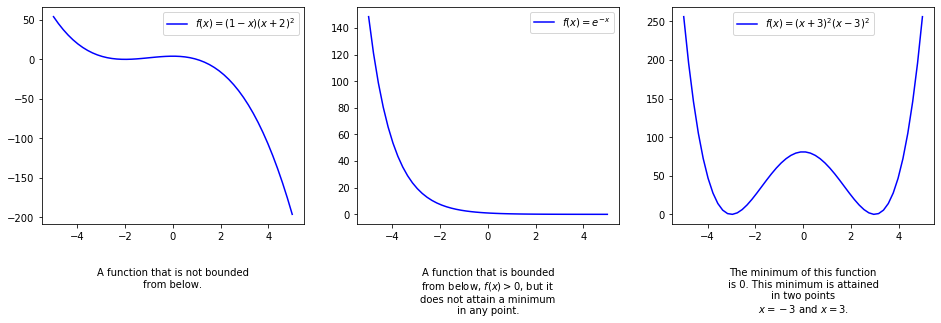

In [7]:
figure1()

If $f$
is differentiable in the location of
the minimum $\vec x^*$, then we know that

$$
f'(\vec x^*) = \left.\frac{\partial f(\vec x)}{\partial \vec x}\right|_{\vec x=\vec x^\ast}
=
\begin{pmatrix}
\left.\frac{\partial f(\vec x)}{\partial x_1}\right|_{\vec x=\vec x^*} \\
\left.\frac{\partial f(\vec x)}{\partial x_2}\right|_{\vec x=\vec x^*} \\
  \vdots \\
\left.\frac{\partial f(\vec x)}{\partial x_n}\right|_{\vec x=\vec x^*} \\
\end{pmatrix}
= \vec 0,
$$

in other words all of the partial derivatives of $f$
at
$\vec x^*$ are zero. If we define $\vec F(\vec x)=f'(\vec x)$, then $\vec F: {\mathbb{R}}^n \to {\mathbb{R}}^n$, and we have that $\vec F(\vec x^*) = 0$.

Inversion problems of the form (for any $\vec F:{\mathbb{R}}^n\to {\mathbb{R}}^n$):

$$
\text{find } \;\;\; \vec x^* \in {\mathbb{R}}^n \;\;\; \text{
such that } \;\;\; \vec F(\vec x^*) = 0
$$

are called <a class="definition" href="#definitions" id="rootfindingproblem">root-finding problem</a>s, and the points 
in which $\vec F(\vec x^*)=0$ are called <a class="definition" href="#definitions" id="roots">roots</a>.

As we will see in the next section not *every* solution of $\vec F(\vec x^*)=\vec 0$, where
$\vec F(\vec x)=\vec f'(\vec x)$ is also a solution of the optimisation problem.



## Local Minima and Maxima (extrema)
In one dimension, i.e. $f:{\mathbb{R}}\to{\mathbb{R}}$ and $F(x)=f'(x): {\mathbb{R}}\to{\mathbb{R}}$, a method
to find local minima and maxima of the function $f$ is to search for roots of
$f'$, i.e. points for which $f'(x)=0$. These points are also called <a class="definition" href="#definitions" id="stationarypoints">stationary
points</a> of the function $f$. 

Consider the following two examples:

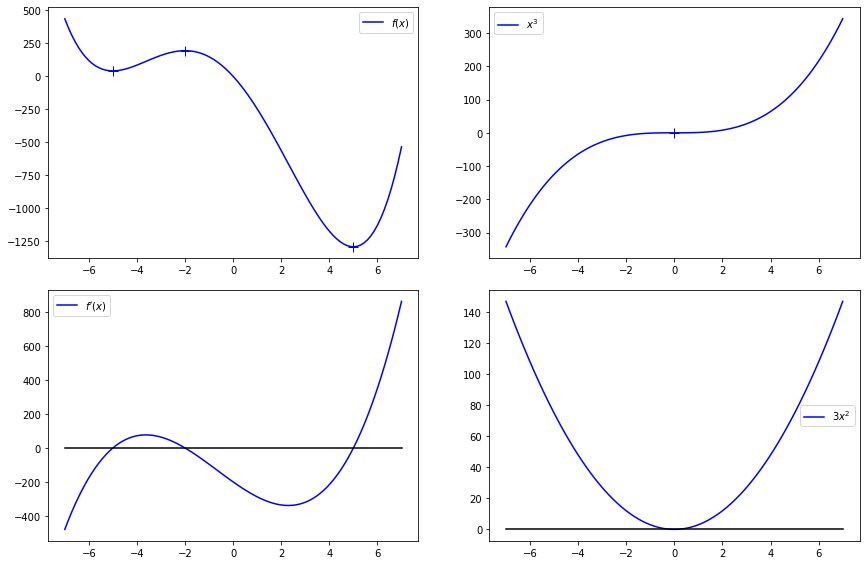

In [8]:
figure2()

The function may have multiple <a class="definition" href="#definitions" id="localminimaormaxima">local minima or maxima</a>, as in the
example on the left, above. In all of these <a class="definition" href="#definitions" id="localextrema">local extrema</a> we have $f'(x)=0$
but for only one point do we have $f(x^*)=\mathrm{min}_{x\in\mathbb{R}}f(x)$, the *global* minimum.
So $f'(x)=0$ does not necessarily mean we have found the <a class="definition" href="#definitions" id="globalminimumormaximum">global minimum (or maximum)</a> of the
function. 

It does not even guarantee that we have found a *local* minimum (or
maximum), as we can see in the example on the right.
In one dimension, a
stationary point of $f$ ($f'(x)=0$), only indicates a local extremum if the
derivative $f'$ changes sign. If $f$, in addition to having zero derivative in
$x$, is twice differentiable in $x$, we can use the second derivative $f''(x)$
to distinguish local minima from local maxima. A positive second derivative,
$f''(x)\gt 0$, guarantees a local minimum. A negative second derivative, $f''(x)\lt 0$
identifies a local maximum. If the second derivative is also zero, $f''(x)=0$, we can
unfortunately draw no further conclusion.

It should be stressed that having a
positive second derivative (in addition to zero first derivative) identifies a
local minimum, but not all local minima have a zero first derivative and
a positive second derivative. So a positive second derivative is a sufficient, but not a
necessary condition for a local minimum as we can see in the following example.

(*Some mathematical terminlogy: "A is a sufficient condition for B" means that A implies B (if A is true then B is true), whereas "A is a necessary condition for B" means that B implies A (if B is true then necessarily A must be true).*)

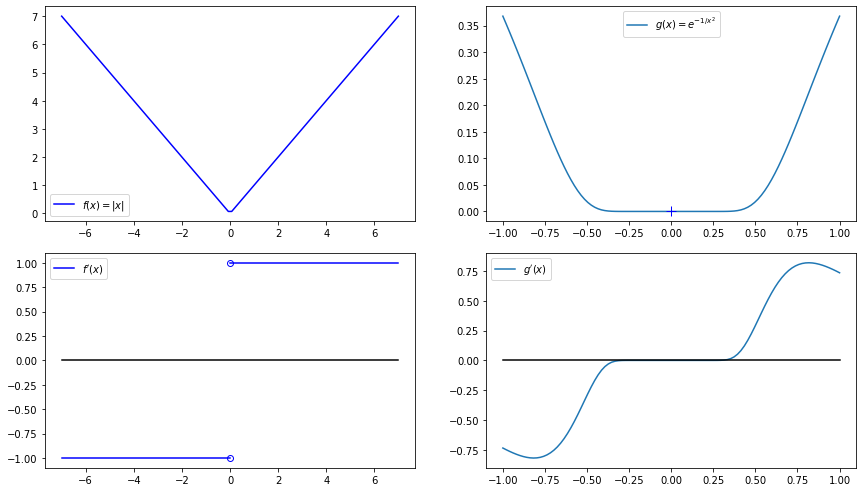

In [9]:
figure3()

In the example above, on the left $f(x)=|x|$ has a minimum at $x=0$ but its
derivative at $x=0$ does not exist. On the right, $g(x)=\exp(-1/x^2)$ again has
a minimum at $x=0$, its first derivative is indeed zero at $x=0$, but so is its
second derivative, and in fact all its higher order derivatives are zero there.

In
more than one dimension, things get a little more complicated, as we can
approach a local extremum from different directions. A well know example of this
in 2 dimensions is formed by a so called <a class="definition" href="#definitions" id="saddlepoint">saddle point</a>:

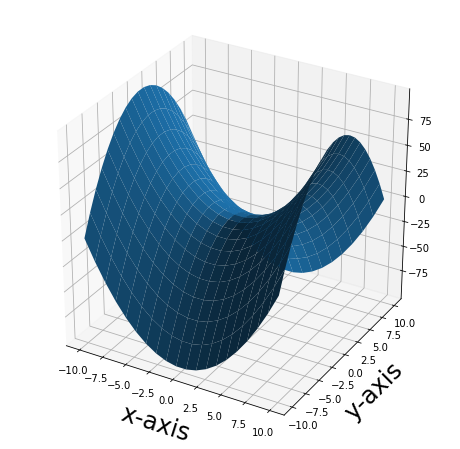

In [10]:
figure4()

In the figure above, $f:{\mathbb{R}}^2 \to {\mathbb{R}}$ is given by

$$
f(\vec x) = \tfrac 12\vec x^T \underline{\mathbf{A}} \vec x, \;\;\; \text{ with } \;\;\;
\underline{\mathbf{A}} =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

(note that post and pre multiplying a matrix with a vector and its transpose in this manner returns a scalar - test this yourself on a $2\times 2$ example).

Its derivative is:

$$
f'(\vec x) = \underline{\mathbf{A}} \vec x
$$

The matrix $\underline{\mathbf{A}}$ is invertible, so $\underline{\mathbf{A}}\vec x=\vec 0$
implies that $\vec x=0$. Therefore
the only stationary point of $f$, where $f'(\vec x)=0$, is at the
origin. However it is clear that this point provides neither a
global, nor a
local minimum or maximum. This can be further illustrated by
looking at the
behaviour of $f$ when heading in different directions from the
stationary point
(in this example located at the origin). Let's take an arbitrary
direction
vector $\vec v$. Then the values of $f$ along the line through the
origin, given
by $t\mapsto t\vec v$, form a one-dimensional function

$$
f_{\vec v}(t) =
\tfrac 12\left(t \vec v\right)^T \underline{\mathbf{A}} \left(t \vec v\right) = \tfrac
12\vec v^T\underline{\mathbf{A}}\vec v ~t^2
$$

As expected, the first derivative of $f_{\vec v}:{\mathbb{R}}\to{\mathbb{R}}$ at $t=0$ (which corresponds to the origin in the ${\mathbb{R}}^2$-plane), is
zero:

$$
f_{\vec v}'(t) = \vec v^T\underline{\mathbf{A}}\vec v ~t \implies f_{\vec v}'(0) = 0
$$

The second derivative however is given by:

$$
f_{\vec v}''(t) = \vec v^T\underline{\mathbf{A}}\vec v
$$

which can be positive or negative depending on our choice of the direction
$\vec v$. In fact:

$$
\vec{v} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \implies
f_{\vec v}''(t) = 1, \\
\vec{v} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \implies
f_{\vec v}''(t) = -1.
$$

In other words, if we head along the x-axis, spanned
by the vector $(1,0)$, the second derivative is positive and thus the values of
$f$ reach a minimum at the origin, whereas if we head along the y-axis $f$
reaches a maximum at the origin.

## Symmetric Positive Definite (SPD) Matrices
We can generalize this analysis to
multiple dimensions for any twice
differentiable function $f: {\mathbb{R}}^n \to {\mathbb{R}}$. Its
derivative $f'$ is a function from
${\mathbb{R}}^n \to {\mathbb{R}}^n$. Its second derivative, often
referred to as the <a class="definition" href="#definitions" id="Hessian">Hessian</a>, is a
function $f'':{\mathbb{R}}^n \to {\mathbb{R}}^n\times{\mathbb{R}}^n$,
meaning that at any point $\vec x\in{\mathbb{R}}^n$ the second derivative is a $n\times n$
matrix $f''(\vec x)$, whose
entries are given by:

$$
\newcommand\jacf[2]{\frac{\partial^2 f(\vec x)}{\partial x_{#1}\partial x_{#2}}}
f''(x) = 
\begin{pmatrix}
\jacf 11 & \jacf
12 & \cdots & \jacf 1n \\
\jacf 21 &
\jacf 22 & \cdots & \jacf 2n \\
\vdots &
\vdots & \ddots & \vdots \\
\jacf n1 &
\jacf n2 & \ldots & \jacf nn
\end{pmatrix}
\label{foo}
$$

Again, a stationary
point of $f$ is defined as any
point $\vec x$ in which $f'(\vec x)$ is zero (that is
the zero vector in ${\mathbb{R}}^n$). A
stationary point $\vec x$ of $f$ is a local minimum
if 

$$
\vec v^T f''(\vec x)
\vec v \gt 0 \;\;\; \text{ for all } \;\;\; \vec v\in{\mathbb{R}}^n,
\;\;\; \text{except } \;\;\;\vec v=0
$$

Note that
from the above expansion of $f''(\vec x)$
it is clear that the Hessian matrix
$f''(\vec x)$ is always symmetric. A matrix
$\underline{\mathbf{A}}$ that is symmetric and
satisfies $\vec v^T\underline{\mathbf{A}}\vec v \gt 0$ for all
$\vec v$, is called <a class="definition" href="#definitions" id="SymmetricPositiveDefiniteSPD">Symmetric
Positive Definite (SPD)</a>. As we were reminded in yesterday's lecture,
the $n$
eigenvalues of a real symmetric $n\times n$-matrix are real-valued
and the matrix has basis of $n$ orthogonal
eigenvectors. From this it follows it can be derived (try it!) that an
equivalent definition of an SPD-matrix is: a real symmetric matrix
whose eigenvalues
are all strictly positive.

A symmetric
$n\times n$-matrix that
satisfies the looser requirement of:

$$
\vec v^T
f''(\vec x) \vec v \ge 0 \;\;\; \text{
for all } \;\;\; \vec v\in{\mathbb{R}}^n
$$

is called <a class="definition" href="#definitions" id="PositiveSemiDefinite">Positive
Semi-Definite</a>. Similar to before, an equivalent definition is given by: a real symmetric matrix whose eigenvalues are all zero or positive.

## Necessary and sufficient conditions for local minima

A <a class="definition" href="#definitions" id="localminimum">local minimum</a> of $f$ is defined as a point $\vec x^*$ (more strictly speaking the point itself is called a <a class="definition" href="#definitions" id="localminimizer">local minimizer</a> and the local minimum is the value of $f$  at that minimizer) for which there is a small, open neighbourhood $V$ around $\vec x^\ast$ such that

$$
  \vec x \in V \implies f(\vec x)\geq f(\vec x^*)
$$

A <a class="definition" href="#definitions" id="strictlocalminimumstrictlocalminimizer">strict local minimum (strict local minimizer)</a> is defined as a point $\vec x^*$ with a small, open neighbourhood $V$ around $\vec x^*$ such that

$$
  \vec x\neq \vec x^* \in V \implies f(\vec x) \gt f(\vec x^*)
$$

in other words it is a unique minimum in the small neighbourhood $V$.

In the following let $f$ be twice-differentiable at $\vec x^*$, then we have 
the following criteria for $x^*$ to be a local minimum:

<b>Necessary conditions:</b>
If $x^*$ is a local minimum of $f$ then
1. the gradient $f'(\vec x^*)=\vec 0$, and
2. the Hessian $f''(\vec x^*)$ is positive semi-definite

<b>Sufficient conditions:</b>
Vice versa, if
1. the gradient $f'(\vec x^*)=\vec 0$, and
2. the Hessian $f''(\vec x^*)$ is Symmetric Positive Definite (SPD),
<br><br>
then $\vec x^*$ is a strict local minimum.

Note that these conditions are not entirely symmetric, if the Hessian is positive semi-definite (rather than SPD) we are still undecided: it may or may not be a local minimum, and even if it is, it may not necessarily be a strict local minimum.

## Quadratic Minimisation and Linear Inversion

Consider the following, generic
quadratic function
$f:{\mathbb{R}}^n\to{\mathbb{R}}$:

<a name="quad"></a>
\begin{equation}
f(\vec x) = \tfrac 12\vec x^T\underline{\mathbf{A}}\vec x - \vec b^T\vec x + c
\tag{quad} \label{quad}
\end{equation}

for
a given $n\times n$
matrix $\underline{\mathbf{A}}$, a given vector $\vec b$, and a given scalar
$c$. 

Noting again that $\vec x^T\underline{\mathbf{A}}\vec x$ is a scalar, and hence equal to its transpose, we have that

$$
\vec x^T\underline{\mathbf{A}}\vec x = \left(\vec x^T\underline{\mathbf{A}}\vec x\right)^T = \vec x^T\underline{\mathbf{A}}^T\vec x
$$

and thus also
$$
\vec x^T\underline{\mathbf{A}}\vec x
= \tfrac 12\vec x^T\left(\underline{\mathbf{A}} + \underline{\mathbf{A}}
^T\right)\vec x.
$$

We may therefore, without loss of generality,
assume that $\underline{\mathbf{A}}$ is
symmetric.

The derivative and
Hessian of $f$ are
given by:

$$
f'(\vec x) = \left(\tfrac 12\underline{\mathbf{A}} + \tfrac
12\underline{\mathbf{A}}^T\right)\vec x
- \vec b
= \underline{\mathbf{A}}\vec x - \vec b \\
f''(\vec x) =
\left(\tfrac 12\underline{\mathbf{A}} + \tfrac
12\underline{\mathbf{A}}^T\right) = \underline{\mathbf{A}}
$$

Note in particular
that the Hessian in this quadratic example is constant.

In lecture 6, we will see that if the matrix $\underline{\mathbf{A}}$ is positive semi-definite (and thus the Hessian everywhere), the function is convex (see definition in lecture 6), it has a well-defined global minimum value, and all its local minima are also global minima.
Since $f$ is differentiable we have that $f'(\vec x^*)=0$ at any such minimum
$\vec x^*$, and therefore $\vec x^*$ is a solution to
the linear inversion problem
$\underline{\mathbf{A}}\vec x^*=\vec b$. If we make the stricter
assumption that $\underline{\mathbf{A}}$ is
Positive Definite (and thus SPD since $\underline{\mathbf{A}}$ is
also assumed symmetric), then
*any* point at which $f'(\vec x)=0$ is a local
minimum, and moreover this point
is unique.

This bring us to the following
important result. The minimisation
problem:

$$
\text{Find } \;\;\; \vec x^\ast \;\;\; \text{
such that }\;\;\; f(\vec x^\ast) =
\min_{\vec x\in{\mathbb{R}}^n} \, f(\vec x)
$$

where $f$ is given
by the quadratic expression
$\eqref{quad}$ with a Symmmetric Positive Definite
(SPD) matrix $\underline{\mathbf{A}}$,
is
equivalent to the linear inversion problem:

$$
\text{Find }\;\;\;  \vec x^\ast \;\;\;  \text{
such that } \;\;\; \underline{\mathbf{A}}\vec x^* = \vec b
$$
and both have a unique solution $\vec x^*$.

# Steepest descent
The <a class="definition" href="#definitions" id="steepestdescent">steepest descent</a>
algorithm is based on the intuitive idea
that in order to iteratively find the
minimum of $f$, one should improve the
current best guess $\vec x^k$ by moving
in the direction in which $f$ decreases
the fastest. This direction is given by
moving in the opposite direction of the
gradient vector $f'\left(\vec x^{(k)}\right)$, and thus the iterative method
takes the form:

$$
\vec x^{(k+1)}
= \vec x^{(k)} - \alpha f'\left(\vec x^{(k)}\right)
$$

with some positive
$\alpha\in{\mathbb{R}}$. Given the direction in which to
move, the next question is of
course how far to go in that direction, or in
other words how to choose
$\alpha$. By evaluating $f$ for increasing $\alpha$ values,
along the line spanned by
going in the negative gradient direction, we obtain
a one-dimensional function
$\hat f:{\mathbb{R}}_{\geq 0}\to{\mathbb{R}}$:

$$
\hat f(\alpha) =
f\left(\vec x^{(k)} - \alpha
f'\left(\vec x^{(k)}\right)\right)
$$

We know that
for small $\alpha$,  $\hat f$
is decreasing (by definition of the local derivative of $f$), but at some point $\hat f$ may start
increasing again. A natural
choice is therefore to choose $\alpha$ to be exactly
the local minimum of $\hat
f$ where $\hat f$ stops decreasing and starts
increasing.

For a general
function $f$ we have now merely reduced (one update step of) a multi-dimensional optimisation
problem to a one-dimensional problem and it is not
immediately obvious how to
proceed. Let us first however consider the simpler
problem where $f$ is given by
the quadratic expression [quad](#quad).

We introduce the following notation

$$
  \vec r^{(k)} = \vec b - \underline{\mathbf{A}}\vec x^{(k)}
$$

This vector is also referred to as the residual vector as it is a measure of how well $\vec x^{(k)}$ satisfies the equation $\underline{\mathbf{A}}\vec x^{(k)}=\vec b$. If $\|\vec r^{(k)}\|=0$ then we have found the solution.

The residual vector is here in fact the opposite of the gradient vector:

$$
  -f'\left(\vec x^{(k)}\right) = -\left(\underline{\mathbf{A}}\vec x^{(k)} - \vec b\right) = \vec r^{(k)}
$$

so that the iteration can be written as:

$$
  \vec x^{(k+1)}
= \vec x^{(k)} + \alpha \vec r^{(k)}
$$

and similarly

$$
\hat f(\alpha) =
f\left(\vec x^{(k)} + \alpha\vec r^{(k)}\right).
$$

Applying the chain rule to evaluate the derivative with respect to 
$\alpha$ gives

\begin{align*}
\hat f{}'(\alpha) &=
f'\left(\vec x^{(k)} + \alpha\vec r^{(k)}\right)
\cdot\frac{\mathrm{d}\left(\vec x^{(k)} + \alpha\vec r^{(k)}\right)}{\mathrm{d}\alpha} \\[10pt]
&= \left(\underline{\mathbf{A}}\left(
\vec x^{(k)} + \alpha\vec r^{(k)}\right) - \vec b\right)
\cdot \vec r^{(k)} \\[10pt]
&= \left(\underline{\mathbf{A}}\vec x^{(k)} - \vec b + \alpha\underline{\mathbf{A}}\vec r^{(k)}\right)
\cdot \vec r^{(k)} \\[10pt]
&= \left(-\vec r^{(k)} + \alpha\underline{\mathbf{A}}
\vec r^{(k)}\right) \cdot \vec r^{(k)} \\[10pt]
&= \alpha \left(\vec r^{(k)}\cdot\underline{\mathbf{A}}\vec r^{(k)}\right)
- \vec r^{(k)}\cdot\vec r^{(k)}
\end{align*}

Solving for $\hat f{}'(\alpha^*)=0$, we
obtain
the optimal choice

<a name="alpha_optimal"></a>
$$
\alpha^* = \frac{\vec r^{(k)}\cdot\vec r^{(k)}}{\vec r^{(k)} \cdot\underline{\mathbf{A}}\vec r^{(k)}}
\tag{alpha_optimal}
\label{alpha_optimal}
$$

Let's construct a problem to demonstrate this approach in practice.

Text(0.5, 0, 'y-axis')

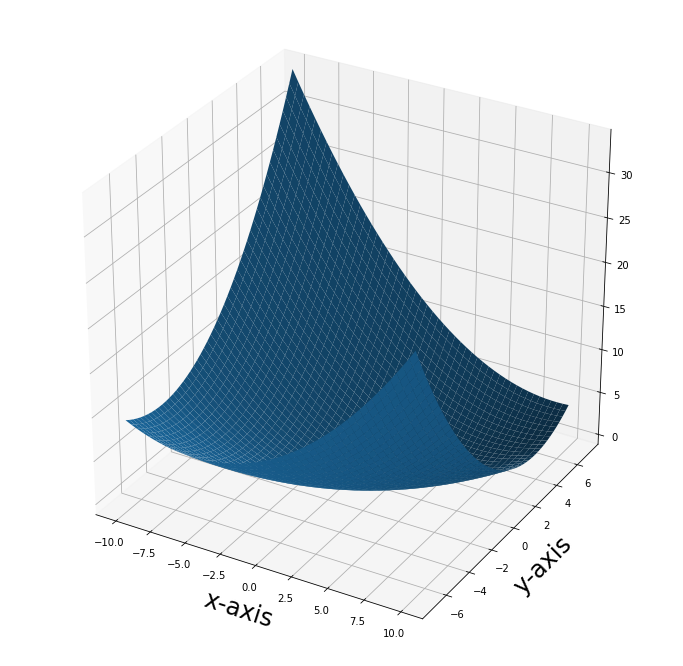

In [11]:
# we set up a quadratic function f(x) = 0.5 x^T A x - b x + c
# as we will see below the contours of this function, are ellipses
# Given the maximum and minimum radius of an ellipse, and the vector that determines
# in which direction the maximum radius occurs (major axis) the function `elliptic_matrix`
# returns the matrix A for which the contour f(x)=1 corresponds to the specified ellipse
v_maj = [2,1]
R_maj, R_min = 5, 2
A = elliptic_matrix(v_maj, R_maj, R_min)

# the minimum of f is in the centre of the ellipses, and as we know
# this minimum location is also the solution of Ax = b
# here, we choose the centre ourselves - and choose b such that
# it is indeed a solution
xs = [3,1]
b = A @ xs

# contruct the quadratic - the constant c=0, but is not relevant
f = quadratic_function(A, b)

# first let's do a 3d surface plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection='3d')
x = np.linspace(-10, 10, 50)
y = np.linspace(-7, 7, 50)
# create a Nx x Ny x 2 (Nx=Ny=50) array of grid points
xy = np.array(np.meshgrid(x, y)).T
ax.plot_surface(xy[:,:,0], xy[:,:,1], f(xy))
ax.set_xlabel('x-axis', size=24, labelpad=10)
ax.set_ylabel('y-axis', size=24, labelpad=10)

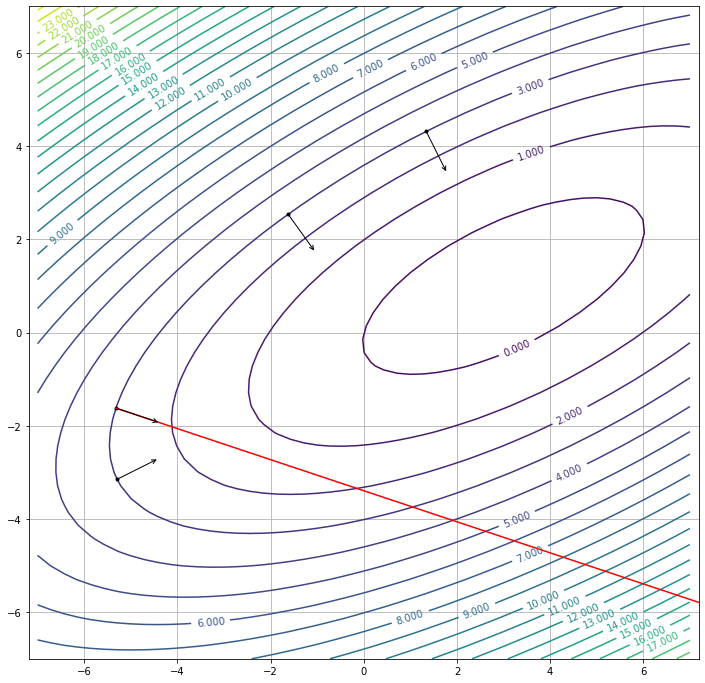

In [12]:
# then a 2d contour plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.grid()
x = np.linspace(-7, 7, 50)
y = np.linspace(-7, 7, 50)
# create a Nx x Ny x 2 (Nx=Ny=50) array of grid points
xy = np.array(np.meshgrid(x, y)).T
c = ax.contour(xy[:,:,0], xy[:,:,1], f(xy), 25)
ax.clabel(c)
# ensure an equal aspect ratio of x and y
# this is important for arrows pointing in the right direction:
axis = ax.axis('equal')

# we'll plot a number of points one a specific contour with value cval
# (we take the value from one of the contours)
cval = c.cvalues[4]

sample_x = sample_points_on_contour(ax, cval, A, b)

for x in sample_x:
    ax.plot(x[0], x[1], 'k.')
    dx = b - A @ x  # negative gradient
    # draw a (normalized) vector in that direction:
    ax.annotate("", xy=x+dx/np.linalg.norm(dx), xytext=x,
                arrowprops={'arrowstyle': '->'})

# use the last sample point to draw a steepest descent line
# we plot it outside the current axis first
ax.plot([x[0], x[0]+1000*dx[0]], [x[1], x[1]+1000*dx[1]], 'r')
# and then restore the old axis
ax.axis(axis);

In the figure above, the black arrows indicate the negative gradient of $f$, which is used as the search direction for the steepest descent algorithm. At the points on each contour that are either the furthest away or the closest to the centre, the negative gradient points exactly in the direction of the centre. The centre here is the
desired solution $\vec x^*$. Thus for those points, if we travel in the steepest descent direction we can immediately hit the solution in a single step. For other points the gradient is not directly bringing us in the correct direction, so we expect to need multiple steps to reach the minimum.

For one of those points we've drawn a red line indicating the search direction
of steepest descent. The values of $f$ along that line, given by $\hat
f(\alpha)$, are displayed in the following figure.

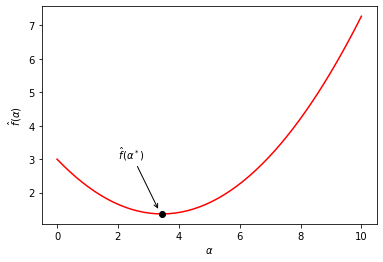

In [13]:
x = sample_x[-1]
figure5(x, A, b)

The values of $\hat f(\alpha)$, corresponding to values of $f$ along the red
line in the previous contour plot. As expected, when we compute $\alpha^*$
according to [(alpha_optimal)](#alpha_optimal) we arrive at the minimum of $f$ along that
line. The point on the line that this corresponds to is taken as the updated
position $x^{(k)}$ in the next step of the steepest descent algorithm.

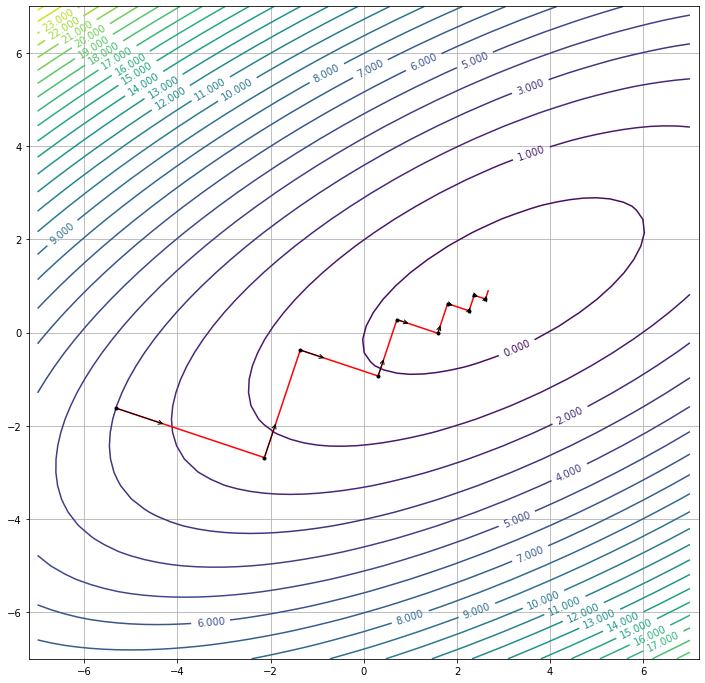

In [18]:
def steepest_descent(A, b, x):
    r = b - A @ x
    alpha_star = np.dot(r, r)/np.dot(r, A @ r)
    return x + alpha_star*r

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.grid()
x = np.linspace(-7, 7, 50)
y = np.linspace(-7, 7, 50)
# create a Nx x Ny x 2 (Nx=Ny=50) array of grid points
xy = np.array(np.meshgrid(x, y)).T
c = ax.contour(xy[:,:,0], xy[:,:,1], f(xy), 25)
ax.clabel(c)
# ensure an equal aspect ratio of x and y
# this is important for angles and arrows pointing in the right direction:
axis = ax.axis('equal')

def arrow(x, dx):
    ax.plot(x[0], x[1], 'k.')
    ax.annotate("", xy=x+dx, xytext=x,
           arrowprops={'arrowstyle': '->'})
    
# same starting point
x0 = sample_x[-1]

for i in range(10):
    x1 = steepest_descent(A, b, x0)

    ax.plot([x0[0], x1[0]], [x0[1], x1[1]], 'r')

    # residual, which is also the gradient of f
    r = A @ x0 - b
    # rescale relative to length of the current step
    r = r/sl.norm(r)*sl.norm(x1-x0)/3.
    arrow(x0, -r)
    
    x0 = x1

The figure above shows the trajectory of the steepest algorith for a number of
steps. As you may notice the direction of each subsequent step is orthogonal to
the previous one (why?). In two dimensions this means that it only moves in two
alternating directions. In more dimensions this is not the case, each new
direction is still orthogonal to the previous one, but the relationship with the
directions in even earlier steps is less obvious. Nonetheless, we can
intuitively see that the steepest descent algorithm takes a somewhat indirect
route and may require quite a few iterations to converge to the desired solution
$x^*$.

# Conjugate gradient

In an ideal world, we would travel in each
direction
exactly as far as required so that we don't need to go in that
direction anymore
in subsequent steps. 

(For the above example if we could achieve this we would reach our solution in only two iterations of course.)

Saying this mathematically, if $\vec r^{(k)}$ is our search direction given by the gradient, 
then starting at $\vec x^{(k)}$ we want a new point

$$
\vec x^{(k+1)} =
\vec x^{(k)} + \alpha
\vec r^{(k)},
$$

such that the vector connecting $x^{(k+1)}$ and the solution $x^*$
is orthogonal to  $r^{(k)}$:


$$
\vec r^{(k)}\cdot
\left(\vec x^* -
\vec x^{(k+1)}\right) = 0.
$$

By substitution we find

\begin{align*}
\vec r^{(k)}\cdot
\left(\vec x^* -
\vec x^{(k+1)}\right) &=
\vec r^{(k)}\cdot
\left(\vec x^* -
\vec x^{(k)} - \alpha
\vec r^{(k)}\right) \\
&= \vec r^{(k)}\cdot\left(\vec x^* -\vec x^{(k)}\right) - \alpha \vec r^{(k)}\cdot\vec r^{(k)} = 0
\end{align*}

which implies

$$
\alpha = \frac{\vec r^{(k)}\cdot\left(\vec x^* -\vec x^{(k)}\right)}{\vec r^{(k)}\cdot\vec r^{(k)}}
$$

A
problem of
course is that this method requires us to know the solution $x^*$ that
we are trying
to converge to in the first place. The difference between the
current guess
$x^{(k)}$ and the actual answer $x^*$ is the (unknown) error which
we'll denote
as

$$
\vec e^{(k)} = \vec x^* - \vec x^{(k)}.
$$

If left-multiply the error $\vec e^{(k)}$ with the matrix $\underline{\mathbf{A}}$

$$
  \underline{\mathbf{A}}\vec e^{(k)} = \underline{\mathbf{A}}\vec x^* - \underline{\mathbf{A}}\vec x^{(k)}
  = \vec b - \underline{\mathbf{A}}\vec x^{(k)} = \vec r^{(k)}  
$$

The equation $\underline{\mathbf{A}}
\vec e^{(k)}=\vec r^{(k)}$ is an important
one that we will be using frequently in this course.
Using $\vec e^{(k)}=\underline{\mathbf{A}}
^{-1}\vec r^{(k)}$, we can now slightly rewrite

<a name="alpha_orthogonal"></a>
$$
\alpha =
\frac{\vec r^{(k)}\cdot \underline{\mathbf{A}}
^{-1}\vec r^{(k)}}{\vec r^{(k)}\cdot \vec r^{(k)}}
\label{alpha_orthogonal}
\tag{alpha_orthogonal}
$$

Of course we don't want to
explicitly compute the
inverse $\underline{\mathbf{A}}^{-1}$, but it is interesting to compare
this result with
[(alpha_optimal)](#alpha_optimal). As it turns out, we can combine the
advantage of the
optimal choice in [(alpha_optimal)](#alpha_optimal) (optimal in the sense
that it always
gives us the minimum in the chosen search direction) *and* have
the property
that the step we take is orthogonal to the error $\vec e^{(k+1)}$ by
redefining what
orthogonal means!

## Inner Products, Orthogonality and Norms
The definition of orthogonality that
you are probably used to says that two
vectors $\vec v$ and $\vec w$ are
orthogonal iff

$$
  \vec v\cdot\vec w = 0
$$

where $\cdot$ signifies the usual
<a class="definition" href="#definitions" id="Euclideaninnerproduct">Euclidean inner product</a> (dot product), i.e.:

$$
  \vec v\cdot\vec w = \vec v^T\vec w = \sum_i v_i w_i
$$

We explicit mention
*Euclidean* here because there
are in fact different inner products that we can
define. To denote these more
general inner products, we'll use the notation
$\langle \vec v, \vec w\rangle$
for the inner product between vectors $\vec v$
and $\vec w$.

### Properties of Inner Products (*)  <a class="tocSkip"></a>

<div class="optional">

For a real vector
space $V$ (for our purposes it is sufficient to
think of $V$ as ${\mathbb{R}}^n$) an inner
product is any function $V\times V\to{\mathbb{R}}$,
mapping pairs of vectors in $V$ to a
real number, that satisfies the following
three conditions:
<br>
1. *symmetry*:
$\langle \vec v, \vec w \rangle = \langle \vec w, \vec v \rangle$ for all $\vec v, \vec w\in V$
<br>
2. *linearity*: $\langle \vec w, \alpha \vec u + \vec v\rangle =
\alpha \langle \vec w, \vec u\rangle +
\langle \vec w, \vec v \rangle$ for all
$\vec u, \vec v, \vec w\in V$ and
$\alpha\in{\mathbb{R}}$
<br>
3. *positivity*: $\langle \vec v, \vec v \rangle \gt 0$ if $\vec v\in V$ and $\vec v\neq 0$
<br>
Note that combining 2. and 1., we also have
linearity in the first argument, i.e.:
<br>
$$
\langle \alpha
\vec u + \vec v, \vec w\rangle = \alpha \langle \vec u, \vec w\rangle + \langle
\vec v, \vec w \rangle
\text{ for all }\vec u, \vec v, \vec w\in V \text{ and
}\alpha\in{\mathbb{R}}
$$
<br>
and thus
$\langle\cdot, \cdot\rangle$ is a so-called <a class="definition" href="#definitions" id="bilinear">bilinear</a> function.
For the case $V={\mathbb{R}}^n$ any
such function can be written using a $n\times n$
matrix $\underline{\mathbf{A}}$:
<br>
$$
\langle
\vec v, \vec w\rangle_{\underline{\mathbf{A}}} = \vec v^T \underline{\mathbf{A}}
\vec w
$$
<br>
In addition, the
properties 1. symmetry, and 3. positivity, mean that
$\underline{\mathbf{A}}$ should be a
Symmetric Positive Definite (SPD) matrix. Vice versa, for
any SPD matrix $\underline{\mathbf{A}}
$ the function $\langle \cdot, \cdot \rangle_{\underline{\mathbf{A}}}$
given above, defines an
inner product.
</div>

In the following we will use the notation $\langle \cdot,
\cdot\rangle_{\underline{\mathbf{A}}}$ for the
<a class="definition" href="#definitions" id="innerproductinducedbyunderlinemathbfA">inner product induced by $\underline{\mathbf{A}}$</a>

$$
\langle
\vec v, \vec w\rangle_{\underline{\mathbf{A}}} = \vec v^T \underline{\mathbf{A}}
\vec w
$$

In this notation, the *Euclidean* inner product can
be defined as the inner product induced by the
$n\times n$ identity matrix
$\underline{\mathbf{1}}$

$$
\langle \vec v, \vec w\rangle_\underline{\mathbf{1}} = \vec v^T\underline{\mathbf{1}}\vec w 
= \vec v^T\vec w = \vec v\cdot\vec w
$$

By choosing a
different inner product than the standard
Euclidean inner product, we also change
the condition for orthogonality. Thus we
should say orthogonal *with respect to*
the specified inner product. For
instance we may call two vectors $\vec v$ and
$\vec w$ orthogonal with respect
to the inner product induced by $\underline{\mathbf{A}}$ if
$\langle \vec v, \vec w\rangle_{\underline{\mathbf{A}}
}=0$. We will also use <a class="definition" href="#definitions" id="underlinemathbfAorthogonal">$\underline{\mathbf{A}}$-orthogonal</a> for short.

Note that choosing a different
inner product also changes the associated
norm. The <a class="definition" href="#definitions" id="Euclideannorm">Euclidean norm</a> (also called
2-norm) is defined as

$$
  \| \vec v \| =
\sqrt{\vec v\cdot \vec v}.
$$

Thus we
may define a norm induced by $\underline{\mathbf{A}}$, the <a class="definition" href="#definitions" id="underlinemathbfAnorm">$\underline{\mathbf{A}}$-norm</a> for short, as

$$
  \| \vec v \|_{\underline{\mathbf{A}}} =
\sqrt{\langle \vec v, \vec v\rangle_{\underline{\mathbf{A}}}}
  =
\sqrt{\vec v^T \underline{\mathbf{A}}\vec v}
$$

This norm satisfies all the usual properties
associated with a [normed vector
space](https://en.wikipedia.org/wiki/Normed_vector_space).

## Inner Products and Coordinate Transformations (*)

<div class="optional">
    
Now it might seem a little
arbitrary to just
choose whatever inner product we like, but it turns out that
there is a very
natural interpretation of different inner products in terms of
coordinate
transformations. 

We have considered our function $f(\vec x)$ to be a
function of
vectors $\vec x\in {\mathbb{R}}^n$, which we may think of as locations, or
coordinates in
${\mathbb{R}}^n$, but what if we choose a different coordinate system?

Suppose there is an
invertible map, a coordinate transformation, between two
coordinate-systems
$\vec x$ and $\hat{\vec x}$ such that $\hat{\vec x}=\Phi(\vec x)$, and vice
versa
$\vec x=\Phi^{-1}(\hat{\vec x})$. 
For simplicity, let's
assume that
$\Phi$ is linear, and we write $\hat{\vec x} = \underline{\mathbf{\Phi}}\vec x$ where
$\underline{\mathbf{\Phi}}$
is now an (invertible) matrix. This has the advantage that movement
along a line
in $\vec x$-space is still along a line in $\hat{\vec x}$-space. If
in $\vec x$-space we take the step:

$$
  \vec x^{(k+1)} = \vec x^{(k)} + \alpha
\vec r^{(k)}
$$

then in $\hat{\vec x}$-space the same step looks like:

\begin{align*}
\hat{\vec x}^{(k+1)} &= \underline{\mathbf{\Phi}}\left(\vec x^{(k)} + \alpha
\vec r^{(k)}\right)
\\
  &= \underline{\mathbf{\Phi}}\vec x^{(k)} + \alpha \underline{\mathbf{\Phi}}\vec r^{(k)}
\\
  &= \hat{\vec x}^{(k)} + \alpha \underline{\mathbf{\Phi}}\vec r^{(k)} \\
\end{align*}

The
error $\hat{\vec e}^{(k+1)}$ in $\hat{\vec x}$-space works out as

\begin{align*}
\hat{\vec e}^{(k+1)} &= \hat{\vec x}^* - \hat{\vec x}^{(k+1)} \\
  &=
\underline{\mathbf{\Phi}}{\vec x}^* -
\underline{\mathbf{\Phi}}\vec x^{(k+1)} = \underline{\mathbf{\Phi}} e^{(k+1)}
\end{align*}

Thus if we want the
step $\hat{\vec x}^{(k+1)}-\hat{\vec x}^{(k)}$ and the error
$\hat{\vec e}^{(k+1)}$ to be orthogonal in $\hat{\vec x}$-space, we need

\begin{align*}
\left(\alpha\underline{\mathbf{\Phi}} \vec r^{(k)}\right)\cdot \underline{\mathbf{\Phi}}\vec e^{(k+1)} &= 0 \\
\vec r^{(k)}\cdot \underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}\vec e^{(k+1)} &= 0 \\
\langle \vec r^{(k)}, \vec e^{(k+1)}\rangle_{\underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}} &= 0
\end{align*}

So instead of demanding
$\vec r^{(k)}\cdot\vec e^{(k+1)}=0$, i.e.
the search direction and the error
should be orthogonal under the Euclidean
inner product, we ask for it to be
orthogonal with respect to the inner product
induced by the matrix
$\underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}$.

Following the same steps as in the
beginning of this
section to obtain
[(alpha_orthogonal)](#alpha_orthogonal), we now get

$$
\alpha =
\frac{\langle \vec r^{(k)}, \underline{\mathbf{A}}^{-1}\vec r^{(k)}\rangle_{\underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}}}{\langle \vec r^{(k)}, \vec r^{(k)}\rangle_{\underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}}}
$$

Now, we get something interesting if we make the following assumption 
about the matrix $\mat A$ of our optimisation problem, and the linear transformation 
$\underline{\mathbf{\Phi}}$: let's assume we have picked $\underline{\mathbf{\Phi}}$ such that $\underline{\mathbf{A}}=\underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}$.
Working out the numerator and denominator of the fraction:

$$
\langle \vec r^{(k)}, \underline{\mathbf{A}}^{-1}\vec r^{(k)}\rangle_{\underline{\mathbf{A}}} = \vec r^{(k)}\cdot\vec r^{(k)} \\
\text{ and }
\langle
\vec r^{(k)}, \vec r^{(k)}\rangle_{\underline{\mathbf{A}}} = \vec r^{(k)}\cdot\underline{\mathbf{A}}\vec r^{(k)}
$$

From this it follows that the choice of $\alpha$ that is needed for $\underline{\mathbf{A}}$-orthogonality between the step $\vec x^{(k+1)}-\vec x^{(k)}$ and the error $\vec e^{(k)}$, is the same as the choice of $\alpha$ that leads to the minimisation of $f$ (compare with the result in [(alpha_optimal)](#alpha_optimal)):

$$
\alpha =
\frac{\langle \vec r^{(k)}, \underline{\mathbf{A}}^{-1}\vec r^{(k)}\rangle_{\underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}}}{\langle \vec r^{(k)}, \vec r^{(k)}\rangle_{\underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}}}
= \frac{\vec r^{(k)}\cdot\vec r^{(k)}}{\vec r^{(k)}\cdot\underline{\mathbf{A}}\vec r^{(k)}}
$$


This is another point at which our assumption that $\underline{\mathbf{A}}$ is a SPD matrix
is very helpful. As we saw before this assumption is necessary for the inner
product induced by $\underline{\mathbf{A}}$ to behave as expected - for example if $\underline{\mathbf{A}}$ is
not positive definite we may end up with a zero $\langle \vec r^{(k)}, \vec r^{(k)}\rangle_{\underline{\mathbf{A}}}$ in the denominator - but it also guarantees that the
existence of a so called [Cholesky
decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition), that is to
say: for any SPD matrix $\underline{\mathbf{A}}$, there exist a real matrix $\underline{\mathbf{\Phi}}$, such
that

$$
  \underline{\mathbf{A}} = \underline{\mathbf{\Phi}}^T \underline{\mathbf{\Phi}}
$$

Although we won't need to explicitly
perform the Cholesky decomposition in the conjugate gradient algorithm, it is a
very useful tool in the analysis of it.</div>

## Changing directions
So far we have
seen that if we start at an initial guess
of $\vec x^{(0)}$ and decide to head
in the opposite of the direction 
of the gradient (remember the residual 
$\vec r$ is the negative of the gradient):

$$
  \vec x^{(1)} = \vec x^{(0)} + \alpha^{(0)}
\vec r^{(0)}
$$

and choose $\alpha^{(0)}$
according to

$$
  \alpha^{(0)} =
\frac{\vec r^{(0)}\cdot\vec r^{(0)}}{\vec r^{(0)}\cdot \underline{\mathbf{A}}\vec r^{(0)}}
$$

then we have achieved two things: 1) the new
point $\vec x^{(1)}$ is where $f$
reaches its minimum along the line through
$x^{(0)}$ going in the (opposite) gradient
direction $\vec r^{(0)}$, 2) the step we make is
$\underline{\mathbf{A}}$-orthogonal to the
error $e^{(1)}$ after the first step:

$$
  \langle
\vec x^{(1)} - \vec x^{(0)},
\vec e^{(1)} \rangle_{\underline{\mathbf{A}}}
  = \langle \alpha^{(0)}\vec r^{(0)}, \vec e^{(1)}
  \rangle_{\underline{\mathbf{A}}} = 0.
$$

This is because we can simply follow the analysis at the start of section 4 that leads up to [(alpha_orthogonal)](#alpha_orthogonal) and replace the dot-product (Euclidean inner products) with the $\underline{\mathbf{A}}$-inner product. Then [(alpha_orthogonal)](#alpha_orthogonal) becomes

<a name="alpha_A_orthogonal"></a>
$$
\alpha^{(0)} =
\frac{\langle \vec r^{(0)}, \underline{\mathbf{A}}
^{-1}\vec r^{(0)}\rangle_{\underline{\mathbf{A}}}}{\langle \vec r^{(k)}, \vec r^{(k)}\rangle_{\underline{\mathbf{A}}}}
=
\frac{\vec r^{(0)} \cdot \underline{\mathbf{A}}
\underline{\mathbf{A}}^{-1}\vec r^{(0)}}{\vec r^{(k)}\cdot \underline{\mathbf{A}}\vec r^{(k)}}
=
\frac{\vec r^{(0)}\cdot\vec r^{(0)}}{\vec r^{(0)}\cdot \underline{\mathbf{A}}\vec r^{(0)}}
\label{alpha_A_orthogonal}
\tag{alpha_A_orthogonal}
$$

which is the same as above.

The reason we want the step $\vec x^{(1)}-\vec x^{(0)}$ to be orthogonal to the error, is because the error is the distance (vector) we still need to go to reach $\vec x^{(*)}$, and we don't want to have to go into the same direction multiple times. In the last section we have seen that the step and the error being $\underline{\mathbf{A}}$-orthogonal, means that in some other coordinate system the error and the step are in fact orthogonal under the standard Euclidean inner product. The linear coordinate transformation $\hat{\vec x}=\underline{\mathbf{\Phi}}\vec x$ that takes us from our own coordinates (in which we have $\underline{\mathbf{A}}$-orthogonality) to the other coordinate system in which the step and the error are orthogonal in the standard sense, is related to the matrix by $\underline{\mathbf{A}}=\underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}$. This is illustrated in the following figure.

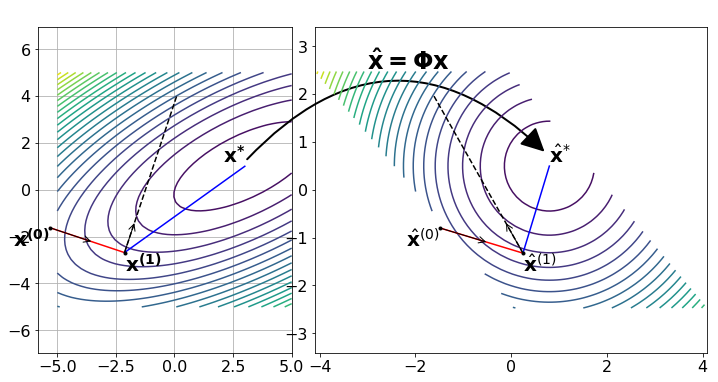

In [12]:
# same starting point
x0 = sample_x[-1]
figure6(x0, A, b)

In the figure above on the left, we have again plotted the first step of
the steepest descent algorithm $\vec x^{(0)} \to \vec x^{(1)}$ (indicated in red). On the right we
have plotted the same step after the coordinate transformation $\hat{\vec x}=\underline{\mathbf{\Phi}}\vec x$ where $\underline{\mathbf{A}}=\underline{\mathbf{\Phi}}^T\underline{\mathbf{\Phi}}$. As expected, the error
$\hat{\vec e}^{(1)}=\hat{\vec x}^* - \hat{\vec x}^{(1)}$ (indicated in blue) is
orthogonal to the first step direction $\hat{\vec x}^{(1)}-\hat{\vec x}^{(0)}=\alpha^{(0)}\underline{\mathbf{\Phi}}\vec r^{(0)}$. This in fact means that in the
transformed coordinate space we have chosen the point along the (red) line
$\hat{\vec x}^{(0)}+\alpha\underline{\mathbf{\Phi}}\vec r^{(0)}$ that is *closest* to $\hat{\vec x}^*$.

However the proposed direction in the second step of the steepest
descent algorithm, based on the gradient/residual $\vec r^{(1)}=\vec b - \underline{\mathbf{A}}
\vec x^{(1)}$ (indicated by the black dashed line), after transformation,
$\underline{\mathbf{\Phi}}\vec r^{(1)}$ is no longer orthogonal to the first step. Thus, going in
this new direction we also change again the component associated with the direction
of the first step, and thus, looking at that component only, move in fact
further away again.

Maybe we can avoid this situation if we decompose 
our new
search direction $\underline{\mathbf{\Phi}} r^{(1)}$ into a component along the first 
direction
$\underline{\mathbf{\Phi}}\vec r^{(0)}$ and a component $\underline{\mathbf{\Phi}}\vec p$ along a direction
orthogonal to that:

\begin{align*}
  \underline{\mathbf{\Phi}}\vec r^{(1)} &= \beta \underline{\mathbf{\Phi}}\vec r^{(0)} + \underline{\mathbf{\Phi}}\vec p \\[10pt]
  \text{or equivalently, }
  \vec r^{(1)} &= \beta
\vec r^{(0)} + \vec p
\end{align*}

What we want is that $\underline{\mathbf{\Phi}}\vec p$ is
orthogonal to $\underline{\mathbf{\Phi}}\vec r^{(0)}$, and we know that
this equivalent to saying that $\vec p$ and $\vec r^{(0)}$,
the same two vectors *before* transformation, are $\underline{\mathbf{A}}$-orthogonal.
Rearranging, to obtain an expression for $\vec p$

$$
  \vec p = \vec r^{(1)} - \beta \vec r^{(0)}
$$

We impose

$$
  \vec r^{(0)}\cdot\underline{\mathbf{A}}\vec p = 
  \vec r^{(0)}\cdot\underline{\mathbf{A}}\vec r^{(1)}
  - \beta \vec r^{(0)}\cdot\underline{\mathbf{A}}\vec r^{(0)} = 0
$$

From this we can work out what $\beta$ should be:

$$
  \beta = \frac{\vec r^{(0)}\cdot \underline{\mathbf{A}}\vec r^{(1)}}{\vec r^{(0)}\cdot\underline{\mathbf{A}}\vec r^{(0)}}
$$

We therefore now
propose to change the search direction in the second step to:

$$
  \vec p^{(1)}
= \vec r^{(1)} - \beta \vec r^{(0)}
$$

and thus the second iterate changes to

$$
\vec x^{(2)} = \vec x^{(1)} + \alpha^{(1)}\vec p^{(1)}
$$

where $\alpha^{(1)}$
is chosen, as before, to obtain the minimal value of $f$ along the 
chosen
search direction, which now gives:

$$
  \alpha^{(1)} = \frac{\vec r^{(1)}\cdot\vec r^{(1)}}{\vec p^{(1)}\cdot\underline{\mathbf{A}}\vec p^{(1)}}
$$

If we look back at the last figure, we have chosen $\vec p$ to be $\underline{\mathbf{A}}$-orthogonal to the red line on the left, and $\underline{\mathbf{\Phi}}\vec p$ to be orthogonal to the red line on the right. This direction should correspond with the blue which goes straight through the solution $\vec x^*$. By making the "optimal" choice for $\alpha^{(1)}$ we therefore expect to land exactly in the solution $\vec x^*$. Let's check this with a few lines of python:

In [19]:
# use same initial guess x0 as before
x0 = sample_x[-1]

# first step - same as steepest descent
r0 = b - A @ x0
alpha0 = np.dot(r0, r0) / np.dot(r0, A @ r0)
x1 = x0 + alpha0 * r0
r1 = b - A @ x1

# second step - we change the direction r1 to a new direction p1
beta = np.dot(r0, A @ r1)/np.dot(r0, A @ r0)
p1 = r1 - beta*r0
alpha1 = np.dot(r1, r1)/np.dot(p1, A @ p1)
x2 = x1 + alpha1*p1

print('Algorithm after 2 steps:', x2)
print('Analytical answer:', xs)

Algorithm after 2 steps: [3. 1.]
Analytical answer: [3, 1]


## Multiple dimensions

As we have seen previously 
the optimal choice of $\alpha^{(0)}$ means that the error $\vec e^{(1)}=
\vec x^*-\vec x^{(1)}$ after the first step is $\underline{\mathbf{A}}$-orthogonal to the first direction.
In two dimensions, there is only such direction. Therefore if we choose, as we did above $\vec p^{(1)}$, the search direction in the second step, to $\underline{\mathbf{A}}$-orthogonal as well to the first search direction, it must be that $\vec p^{(1)}$ and $\vec e^{(1)}$ are in the same direction. As we have seen this means that we can reach the exact answer $\vec x^*$ at the end of the second step using the optimal value of $\alpha^{(1)}$.

In three dimensions, again, the error at the  end of the first step,
is $\underline{\mathbf{A}}$-orthogonal to the first step
direction. This is however not the only direction that is $\underline{\mathbf{A}}$-orthogonal to the first step direction. In fact the different directions, all starting from $\vec x^{(1)}$, span a plane that is $\underline{\mathbf{A}}$-orthogonal as a whole to the first search direction. The error at first step $\vec e^{(1)}=
\vec x^*-\vec x^{(1)}$, which lies in this plane, is the vector that points from $\vec x^{(1)}$ to $\vec x^*$ and therefore the solution $\vec x^*$ also lies in the plane.

The second step of the steepest descent algorithm follows $\vec r^{(1)}$, but as
in two dimensions, this direction is not $\underline{\mathbf{A}}$-orthogonal to $\vec r^{(0)}$,
and therefore does not lie in the plane. We can follow the same procedure as
before, to subtract the $\vec r^{(0)}$ component, which will give us a search
direction $\vec p^{(1)}$ which does lie in the plane. Since, however, we now have
two directions left that lie in the plane, this new direction is not guaranteed
to be in the same direction as the exact error and therefore we will in general
not reach the exact answer in two steps.

Instead in the second step we proceed
in the $\vec p^{(1)}$-direction, and choose the point $\vec x^{(2)}$ such that
$\vec x^{(2)}-\vec x^{(1)}$ is $\vec A$-orthogonal to the error. In principle
this means that after the first step, we have reduced our problem to a
2-dimensional problem, starting at $\vec x^{(1)}$ and with first search
direction $\vec p^{(1)}$. Thus we should be able to reach the exact answer in
two steps, $\vec x^{(1)}\to\vec x^{(2)}$ and $\vec x^{(2)}\to\vec x^{(3)}$ by
following the same recipe as before. At $\vec x^{(2)}$, however, we should be
careful to note that the gradient/residual vector $\vec r^{(2)}$ is a
3-dimensional vector. As before we need to take care to make it $\underline{\mathbf{A}}$-orthogonal
to the previous direction $\vec p^{(1)}$, to avoid "going back" in that
direction. However, the 3-dimensional gradient is also not necessarily orthogonal to
$\vec r^{(0)}$, in other words it is not necessarily in the plane. Thus to fix
the direction we write

$$
  \vec p^{(2)} = \vec r^{(2)} - \beta_{2,0} \vec r^{(0)} - \beta_{2,1}\vec p^{(1)}.
$$

and subtract both a $\vec r^{(0)}$-component and a $\vec p^{(1)}$-component to make $\vec p^{(2)}$ $\underline{\mathbf{A}}$-orthogonal to both vectors.

As before,taking the $\underline{\mathbf{A}}$-induced inner
product with $\vec r^{(0)}$, and $\vec p^{(1)}$ respectively

\begin{align*}
\vec r^{(0)}\cdot \underline{\mathbf{A}}\vec p^{(2)} = 0 \implies
  \beta_{2,0} &= \frac{\vec r^{(0)}\cdot \underline{\mathbf{A}}\vec r^{(2)}}{\vec r^{(0)}\cdot\underline{\mathbf{A}}\vec r^{(0)}}
  \\
\vec p^{(1)}\cdot \underline{\mathbf{A}}\vec p^{(2)} = 0 \implies
  \beta_{2,1} &= \frac{\vec p^{(1)}\cdot \underline{\mathbf{A}}\vec r^{(2)}}{\vec p^{(1)}\cdot\underline{\mathbf{A}}\vec p^{(1)}}
\end{align*}

This procedure can be generalized to $n$ dimensions. In the first
step we reach the $n-1$-dimensional subspace of ${\mathbb{R}}^n$ that is $A$-orthogonal to
$\vec r^{(0)}$ (a hyper plane). Each subsequent step we further reduce the
dimension of the subspace and so arrive at the exact answer in $n$ steps. Every
step however we need to ensure that our current search direction $\vec p^{(i)}$
is orthogonal to all previous search directions $\vec p^{(j)}, j\lt{i}$. Thus we use

$$
  \vec p^{(i)} = \vec r^{(i)} - \sum_{j\lt i} \beta_{i, j} \vec p^{(j)}
$$

with

$$
  \beta_{i,j} = \frac{\vec p^{(j)}\cdot \underline{\mathbf{A}}\vec r^{(i)}}{\vec p^{(j)}\cdot\underline{\mathbf{A}}\vec p^{(j)}}.
$$

For convenience we have here defined $\vec p^{(0)}=\vec r^{(0)}$ (which is after all the first search direction).

In the python code below, we show that we can indeed arrive at the exact answer in 3 steps.

In [18]:
# first we construct a rather arbritrary matrix, but one that is guaranteed to be SPD
Q = np.empty((3,3))
Q[0,:] = [1, -2, 5]  # arbitrarily chosen direction
Q[1,:] = [1, -2, -1]  # and two orthogonal directions
Q[2,:] = [2, 1, 0]
# NOTE: Q is not normalized, so the diagonal values are *not* the eigenvalues
# regardless this should give us an SPD matrix:
A = Q @ np.diag([.2, 2, 5]) @ Q.T

# we choose the exact answer, and then set b=A xs, so that xs is indeed the solution
xs = [1, 2, 3]  # the exact answer
b = A @ xs

# initial guess, starting from zero this time
x0 = [0,0,0]

# step 1
r0 = b - A @ x0
alpha0 = np.dot(r0, r0) / np.dot(r0, A @ r0)
x1 = x0 + alpha0 * r0

# step 2
r1 = b - A @ x1
beta10 = np.dot(r0, A @ r1)/np.dot(r0, A @ r0)
p1 = r1 - beta10*r0
alpha1 = np.dot(r1, r1)/np.dot(p1, A @ p1)
x2 = x1 + alpha1*p1

# step 3
r2 = b - A @ x2
beta20 = np.dot(r0, A @ r2)/np.dot(r0, A @ r0)
beta21 = np.dot(p1, A @ r2)/np.dot(p1, A @ p1)
p2 = r2 - beta20*r0 - beta21*p1
alpha2 = np.dot(r2, r2)/np.dot(p2, A @ p2)
x3 = x2 + alpha2*p2

print('Algorithm after 2 steps:', x3)
print('Analytical answer:', xs)

Algorithm after 2 steps: [1. 2. 3.]
Analytical answer: [1, 2, 3]


## The Krylov subspace

It should be noted that the corrections to the residual
vectors $\vec r^{(i)}$ to obtain the so-called <a class="definition" href="#definitions" id="conjugateddirections">conjugated directions</a> $\vec p^{(i)}$, are
linear combinations of previous residual vectors $\vec r^{(j)}, j\lt i$ and thus
every conjugated direction itself is a linear combination of the residual
vectors. We will denote the space spanned by the residual vectors

$$
\mathcal{D}_i = \operatorname{span}\{\vec r^{(0)}, \vec r^{(1)}, \cdots, \vec r^{(i)}\}
$$

and we have $\vec p^{(j)}\in\mathcal{D}_i$ for all $j\leq i$. Thus,
since the search directions $\vec p^{(j)}$ are linearly independent (this
follows from their $\underline{\mathbf{A}}$-orthogonality), the same $i+1$ dimensional space is
spanned by the search directions

$$
  \mathcal{D}_i = \operatorname{span}\{\vec p^{(0)}, \vec p^{(1)}, \cdots, \vec p^{(i)}\}
$$

The residual vector in each
step can be calculated from the residual of the previous
step using

<a name="residual_update"></a>
$$
  \vec r^{(i+1)} = \vec b - \underline{\mathbf{A}} \vec x^{(i+1)}
  = \vec b - \underline{\mathbf{A}} \left(\vec x^{(i)} + \alpha^{(i)}\vec p^{(i)}\right)
  = \vec r^{(i)} - \alpha^{(i)}\underline{\mathbf{A}}
p^{(i)}
  \label{residual_update} \tag{residual_update}
$$

If we want to extend
$\mathcal{D}_i$ to $\mathcal{D}_{i+1}$, since $\vec r^{(i)}$ is already in
$\mathcal{D}_{i+1}$ all we need to add is a vector $\vec p^{(i)}\in\mathcal{D}_i$ multiplied by $\underline{\mathbf{A}}$. This way we can build up the
space $\mathcal{D}_i$:

\begin{align*}
  \mathcal{D}_0 &=
\operatorname{span}\{\vec r^{(0)}\}, \\
  \mathcal{D}_1 &=
\operatorname{span}\{\vec r^{(0)}, \underline{\mathbf{A}}\vec r^{(0)}\} \\
  \mathcal{D}_2 &=
\operatorname{span}\{\vec r^{(0)}, \underline{\mathbf{A}}\vec r^{(0)}, \underline{\mathbf{A}}^2\vec r^{(0)}\} \\
\cdots \\
  \mathcal{D}_i &= \operatorname{span}\{\vec r^{(0)}, \underline{\mathbf{A}}\vec r^{(0)}, \cdots
    \underline{\mathbf{A}}^i\vec r^{(i)}\}
\end{align*}

The space
$\mathcal{D}_i$ is called the <a class="definition" href="#definitions" id="Krylovsubspace">Krylov subspace</a>,
a concept we will get back to in lecture 5 when we will discuss the larger class of *Krylov Subspace Methods* (of which the Conjugate Gradient method is a member).

<div class="optional">
In the
method of conjugated directions every new point $\vec x^{(i+1)}$ is chosen in a
minimum along the line $\vec x^{(i)}+\alpha\vec p^{(i)}$. Thus the (negative)
gradient a.k.a residual at that point satisfies:

$$
  \vec p^{(i)}\cdot\vec r^{(i+1)} = 0
$$

For any $j\geq i+1$, we may write:

\begin{align*}
  \vec p^{(i)}\cdot\vec r^{(i+1)}
    &= \vec p^{(i)}\cdot \left(\vec b - \underline{\mathbf{A}}\vec x^{(i+1)}\right) \\
    &= \vec p^{(i)}\cdot \left(\vec b - \underline{\mathbf{A}}\vec x^{(j)} +
\underline{\mathbf{A}}\vec x^{(j)} - \underline{\mathbf{A}}\vec x^{(i+1)}\right) \\
    &= \vec p^{(i)}\cdot\vec r^{(j)} + \vec p^{(i)}\cdot\underline{\mathbf{A}}\left(\vec x^{(j)}-\vec x^{(i+1)}\right) \\
&=
\vec p^{(i)}\cdot\vec r^{(j)} - \sum_{k={i+1}}^{j-1} \alpha^{(k)} \vec p^{(i)}\cdot\underline{\mathbf{A}}
\vec p^{(k)} \\
    &= \vec p^{(i)}\cdot\vec r^{(j)} + 0 = 0.
\end{align*}

In
other
words

$$
  \vec p^{(i)}\cdot\vec r^{(j)} = 0 \;\;\; \text{ for all } \;\;\; j\gt i
$$

Since
$\mathcal{D}_i$ is spanned by vectors $\vec p^{(i)}$, this must mean that $\vec r^{(j)}$ is orthogonal to all vectors in $\mathcal{D}_i$ for $j\gt i$. In
particular

$$
  \vec r^{(i)}\cdot\vec r^{(j)} = 0 \text{ for all } j\gt i,
$$

which
by symmetry this implies for all $j\neq i$.

Finally taking the dot product of
$\vec r^{(j)}$ with [(residual_update)](#residual_update), we get

\begin{align*}
  \vec r^{(j)}\underline{\mathbf{A}}\vec p^{(i)} &= 0
    \;\;\; \text{ if } \;\;\; j\neq i \;\;\;\text{ and } \;\;\; j\neq i+1 \\
\alpha^{(i)}\vec r^{(i+1)}\underline{\mathbf{A}}\vec p^{(i)} &= -\vec r^{(i+1)}\cdot\vec r^{(i+1)} \\
  \alpha^{(i)}\vec r^{(i)}\underline{\mathbf{A}}\vec p^{(i)} &= \vec r^{(i)}\cdot\vec r^{(i)}
\end{align*}
</div>

In the equations above we have proven that in
fact $\beta_{i+1,j}=0$ for all $j\lt i$. That means for any new search direction
$\vec p^{(i+1)}$ based on $\vec r^{(i+1)}$ we only need to subtract the
component in the $\vec p^{(i)}$ direction using the nonzero $\beta_{i+1,i}$.
All other $\vec p^{(j)}$-directions
with $j\lt i$ are automatically $\underline{\mathbf{A}}$-orthogonal to $\vec r^{(i+1)}$ already! This means that the new direction $\vec p^{(i+1)}$ will be $\underline{\mathbf{A}}$-orthogonal to the entire Krylov subspace $\mathcal{D}_i$. We have also proven that the new residual $\vec r^{(i+1)}$, and thus the new gradient, will be orthogonal (Euclidean!) to the entire Krylov subspace.

For the 3D case we check this in the code below:

In [15]:
# check some of our theoretical results with the 3d case above
# these should all be zero (up to machine precision)

# check that p2 is A-orthogonal to D_1 = {r0, Ar0}
# (NOTE: we need an extra A to get A-orthogonality)
print(np.dot(p2, A@r0), np.dot(p2, A @ A @ r0))

# check that r2 is orthogonal to D_1 = {r0, Ar0}
print(np.dot(r2, r0), np.dot(r2, A @ r0))

# similarly p1 is A-orthogonal to D_0 and r1 is orthogonal to D_0
print(np.dot(p1, A @ r0), np.dot(r1, r0))

# the above means that beta_2,0 should be zero as well
print(beta20)

-9.094947017729282e-13 2.9103830456733704e-11
-3.7836400679225335e-13 -4.979483492206782e-11
-1.4299672557172016e-12 1.861427678662153e-13
-4.70701709723681e-17


Finally, for the only nonzero coefficients, we can work out

$$
  \beta_{i+1,i} = \frac{\vec p^{(i)}\cdot\underline{\mathbf{A}}\vec r^{(i+1)}}{\vec p^{(i)}\cdot\underline{\mathbf{A}} \vec p^{(i)}} = -\frac 1{\alpha^{(i)}}
\frac{\vec r^{(i+1)}\cdot\vec r^{(i+1)}}{\vec p^{(i)}\cdot\underline{\mathbf{A}} \vec p^{(i)}}
=
-\frac{\vec r^{(i+1)}\cdot\vec r^{(i+1)}}{\vec r^{(i)}\cdot\vec r^{(i)}}
$$

and
thus the update for $\vec p^{(i+1)}$ simplifies to

$$
  \vec p^{(i+1)} =
\vec r^{(i+1)} + \beta^{(i+1)}\vec p^{(i)}, \;\;\; \text{ with } \;\;\;
  \beta^{(i+1)} =
\frac{\vec r^{(i+1)}\cdot\vec r^{(i+1)}}{\vec r^{(i)}\cdot\vec r^{(i)}}
$$

where
we have taken the opportunity to change the sign convention for $\beta:
\beta^{(i+1)} = -\beta_{i+1,i}$ - this is to be consistent with the literature.

## Finally: the Conjugate Gradient algorithm
Plugging all results so far
together we arrive at the following algorithm

\begin{align*}
   \vec p^{(0)} =
\vec r^{(0)} = \vec b - \underline{\mathbf{A}}\vec x^{(0)} \\
\text{for } i\in\{0, 1, \cdots,
n-1\}: \\
   \alpha^{(i)} &= \frac{\vec r^{(i)}\cdot\vec r^{(i)}}{\vec p^{(i)}\cdot\underline{\mathbf{A}}\vec p^{(i)}} \\
   \vec x^{(i+1)} &= \vec x^{(i)} +
\alpha^{(i)} \vec p^{(i)} \\
   \vec r^{(i+1)} &=
\vec r^{(i)} - \alpha^{(i)}
\underline{\mathbf{A}}\vec p^{(i)} \\
   \beta^{(i+1)} &= \frac{\vec r^{(i+1)}\cdot\vec r^{(i+1)}}{\vec r^{(i)}\cdot\vec r^{(i)}} \\
   \vec p^{(i+1)} &= \vec r^{(i+1)}
+ \beta^{(i+1)}\vec p^{(i)}
\end{align*}

or in code:

In [16]:
def conjugate_gradient(A, b, x0):
    r0 = b - A @ x0
    p = r0
    x = x0
    for i in range(A.shape[0]):
        Ap = A @ p
        alpha = np.dot(r0, r0) / np.dot(p, Ap)
        x = x + alpha * p
        r1 = r0 - alpha * Ap
        beta = np.dot(r1, r1)/np.dot(r0, r0)
        p = r1 + beta * p
        r0 = r1
    return x

Note that by saving the intermediate result `Ap`, per iteration we only need to
do one matrix-vector multiplication, the most expensive operation in the
algorithm. We will return to a more detailed analysis of the computational cost
of the algorithm in comparison with other algorithms in lecture 5.

# Nonlinear Conjugate Gradient (*)

<div class="optional" markdown=1>

We derived the conjugate gradient algorithm as a
modification
of the steepest descent algorithm which itself was motivated by the
idea of
"heading in the negative gradient direction" to find the minimum of a
function
$f$. The properties of the conjugate gradient algorithm were then
derived by
assuming $f$ is quadratic and of the form

$$
f(\vec x) = \tfrac
12\vec x^T\underline{\mathbf{A}}
\vec x - \vec b^T\vec x + c
$$

where $\vec A$ was assumed to be
a SPD matrix.
This function is convex and has a unique minimum in $\vec x^*$
(its only local
minimum) that satisfies

$$
  \underline{\mathbf{A}} \vec x^* = \vec b
$$

Thus
the algorithm can also
be thought of as a method to solve any linear system where
$\underline{\mathbf{A}}$ is SPD. In
lecture 5 we will look at other iterative algorithms to
solve linear systems,
and compare with direct methods that invert the matrix
$\underline{\mathbf{A}}$ (or a
decomposition of it) directly.

For now though, let us
investigate whether the
algorithm is also useful in the minimisation of more
generic functions $f$. If
we drop the requirement that the second derivative
(Hessian) of $f$ is SPD
everywhere, we are no longer guaranteed that the
function achieves its minimum
at a single unique local minimum. There might be
multiple local minima (and
maxima), in which case a method that is based on
local gradients will simply
stall at a local minimum as the gradient goes to
zero. Another potential issue
arises if the function is decreasing towards
infinity (or towards the boundaries
of our domain), in which case a gradient-
based algorithm will not converge at
all (or get stuck at the boundary).

This
is a general problem for gradient-
based algorithms. However, let us assume we
have sufficient knowledge of our
problem that we pick a starting point that is
"uphill" from the minimum that we
seek. Even in the case of multiple local
minima, it might be good enough to find
the nearest local minimum rather than a
guaranteed global minimum.

There are a few changes we need to make the 
Conjugate Gradient (CG) algorithm suitable for 
generic nonlinear functions $f$. The first is to replace
the residual calculation based on the 
$\vec b-\underline{\mathbf{A}}\vec x$ by the negative gradient

$$
  \vec r^{(k)} = -f'(x^{(k)})
$$

Note that we are searching for a stationary point, so the 
residual, as before, measures how close we are to 
satisfying $f'(\vec x) = \vec 0$.

The second change is in the choice of $\alpha$. When solving a linear system
$\underline{\mathbf{A}}\vec x=\vec b$, we have a quadratic $f$, and thus we could easily find
the minimum of $f$ restricted to the line spanned by the search direction. In the general nonlinear
case, the restriction of $f$ to this line can be any nonlinear 1D function,
and thus finding the minimum along it would require a generic 1D nonlinear solve.
In practice, performing such a solve every iteration of the full problem in all dimensions
does not lead to an efficient method. In the next lecture we will discuss *line search methods* that choose an $\alpha$ that merely lead to a *sufficient decrease* in $f$, rather than the lowest value of $f$ possible.

Finally, as we have seen in the derivation of the $\beta$ coefficients above, there are several different ways to express these, which for the linear case are all equivalent. In the nonlinear case, however they are not and different choices leads to different behaviour. Using the same expression for $\beta$ as in the linear algorithm above

$$
  \beta_{FR}^{(i+1)} = \frac{\vec r^{(i+1)}\cdot\vec r^{(i+1)}}{\vec r^{(i)}\cdot\vec r^{(i)}}
$$

is called the *Fletcher-Reeves* method. The Polak-Ribière method

$$
  \beta_{PR}^{(i+1)} = \frac{\vec r^{(i+1)}\cdot\left(\vec r^{(i+1)}-\vec r^{(i)}\right)}{\vec r^{(i)}\cdot\vec r^{(i)}}
$$

generally converges more quickly, but in some cases leads to infinite cycling without converging. This can be avoided by ensuring that $\beta$ stays positive, i.e. choosing $\beta=\max(\beta_{PR}, 0)$.

In the next lecture we will discuss more sophisticated methods to solve nonlinear systems, that will generally lead to faster convergence. These may however require more information about the system (such as a second derivative of $f$), more expense per iteration, and more memory costs. For these reasons the relatively simple Nonlinear Conjugate Gradient method can be a cost-effective method for certain problems.
</div>

# Further Reading <a class="tocSkip"></a>
You can find many more details on the Conjugate Gradient method
in the very readable [An Introduction to the Conjugate Gradient Method Without the Agonizing Pain](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf) by Jonathan Shewchuk.

# List of Definitions
<a id="definitions"/>

* <a class=definition href="#optimisationproblem">optimisation problem</a>
* <a class=definition href="#rootfindingproblem">root-finding problem</a>
* <a class=definition href="#roots">roots</a>
* <a class=definition href="#stationarypoints">stationary points</a>
* <a class=definition href="#localminimaormaxima">local minima or maxima</a>
* <a class=definition href="#localextrema">local extrema</a>
* <a class=definition href="#globalminimumormaximum">global minimum (or maximum)</a>
* <a class=definition href="#saddlepoint">saddle point</a>
* <a class=definition href="#Hessian">Hessian</a>
* <a class=definition href="#SymmetricPositiveDefiniteSPD">Symmetric Positive Definite (SPD)</a>
* <a class=definition href="#PositiveSemiDefinite">Positive Semi-Definite</a>
* <a class=definition href="#localminimum">local minimum</a>
* <a class=definition href="#localminimizer">local minimizer</a>
* <a class=definition href="#strictlocalminimumstrictlocalminimizer">strict local minimum (strict local minimizer)</a>
* <a class=definition href="#steepestdescent">steepest descent</a>
* <a class=definition href="#Euclideaninnerproduct">Euclidean inner product</a>
* <a class=definition href="#bilinear">bilinear</a>
* <a class=definition href="#innerproductinducedbyunderlinemathbfA">inner product induced by $\underline{\mathbf{A}}$</a>
* <a class=definition href="#underlinemathbfAorthogonal">$\underline{\mathbf{A}}$-orthogonal</a>
* <a class=definition href="#Euclideannorm">Euclidean norm</a>
* <a class=definition href="#underlinemathbfAnorm">$\underline{\mathbf{A}}$-norm</a>
* <a class=definition href="#conjugateddirections">conjugated directions</a>
* <a class=definition href="#Krylovsubspace">Krylov subspace</a>
